In [1]:
#!pip install pystan

In [2]:
#conda install -n tensorflow_2 -c conda-forge fbprophet

In [130]:
import warnings
warnings.filterwarnings("ignore")

In [3]:

import fbprophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


In [4]:
#!pip install xlrd

In [5]:
#!pip install openpyxl

In [6]:
df=pd.read_excel("C:/Users/VERSHA TYAGI/Downloads/Sales_Forecast_Data.xlsx",engine='openpyxl')

In [7]:
df.head(50)

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.000
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.710
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.000
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.000
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.590
5,2014-2015,Nov,Haryana,Insecticides,Jind,kadoo,0.000
6,2014-2015,Nov,Haryana,Insecticides,Sirsa,kadoo,0.000
7,2014-2015,Nov,Haryana,Insecticides,Hisar,kadoo,0.000
8,2014-2015,Nov,Haryana,Insecticides,Bhiwani,kadoo,0.000
9,2014-2015,Nov,Haryana,Insecticides,Rohtak,kadoo,0.000


In [8]:
df1=df[df["COMPANY"]=="ABC Manufacturing"]

In [9]:
df1.head(50)

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110
54,2014-2015,Dec,Haryana,Insecticides,Jind,ABC Manufacturing,9215.100
55,2014-2015,Dec,Haryana,Insecticides,Fatehabad,ABC Manufacturing,14653.845
56,2014-2015,Dec,Haryana,Insecticides,Hisar,ABC Manufacturing,7497.495
57,2014-2015,Dec,Haryana,Insecticides,Bhiwani,ABC Manufacturing,7843.500
58,2014-2015,Dec,Haryana,Insecticides,Rohtak,ABC Manufacturing,4540.725


In [10]:
df1.dtypes

FIN_YEAR     object
MONTH        object
STATE        object
FG           object
DISTRICT     object
COMPANY      object
VALUE       float64
dtype: object

In [11]:
df1.nunique()

FIN_YEAR        4
MONTH          12
STATE           5
FG              4
DISTRICT      141
COMPANY         1
VALUE       10469
dtype: int64

In [12]:
pd.unique(df1.FIN_YEAR)

array(['2014-2015', '2015-2016', '2016-2017', '2017-2018'], dtype=object)

In [13]:
df1.isna().sum()

FIN_YEAR    0
MONTH       0
STATE       0
FG          0
DISTRICT    0
COMPANY     0
VALUE       0
dtype: int64

In [14]:
df1.FIN_YEAR.unique()

array(['2014-2015', '2015-2016', '2016-2017', '2017-2018'], dtype=object)

In [15]:
df1.FIN_YEAR=list(map(lambda x:int(x[:4]) ,df1.FIN_YEAR))

In [16]:
df1

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110
...,...,...,...,...,...,...,...
230090,2016,Feb,Punjab,Bactericides,Barnala,ABC Manufacturing,0.000
230144,2016,Dec,Uttar Pradesh,Bactericides,Faizabad,ABC Manufacturing,0.000
230145,2016,Dec,Uttar Pradesh,Bactericides,Basti,ABC Manufacturing,0.000
230146,2016,Dec,Uttar Pradesh,Bactericides,Ballia,ABC Manufacturing,0.000


In [17]:
df1["date"]=pd.to_datetime(df1.FIN_YEAR.astype(str) + '/' + df1.MONTH.astype(str) + '/01')

In [18]:
df1

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,date
49,2014,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014-12-01
50,2014,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014-12-01
51,2014,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014-12-01
52,2014,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014-12-01
53,2014,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014-12-01
...,...,...,...,...,...,...,...,...
230090,2016,Feb,Punjab,Bactericides,Barnala,ABC Manufacturing,0.000,2016-02-01
230144,2016,Dec,Uttar Pradesh,Bactericides,Faizabad,ABC Manufacturing,0.000,2016-12-01
230145,2016,Dec,Uttar Pradesh,Bactericides,Basti,ABC Manufacturing,0.000,2016-12-01
230146,2016,Dec,Uttar Pradesh,Bactericides,Ballia,ABC Manufacturing,0.000,2016-12-01


In [19]:
df1=df1[["STATE","VALUE","date"]]
df1
df1[df1["STATE"]=="Punjab"]

,STATE,VALUE,date
2014,Punjab,0.000,2014-03-01
2015,Punjab,1443.690,2014-03-01
2016,Punjab,3889.755,2014-03-01
2017,Punjab,1339.200,2014-03-01
2018,Punjab,526.500,2014-03-01
...,...,...,...
230086,Punjab,0.000,2016-02-01
230087,Punjab,0.000,2016-02-01
230088,Punjab,0.000,2016-02-01
230089,Punjab,0.000,2016-02-01


In [20]:
pd.set_option('Display.max_rows',None)
df1[df1["STATE"]=="Punjab"].sort_values("date")

,STATE,VALUE,date
63529,Punjab,0.000,2014-01-01
6157,Punjab,7318.350,2014-01-01
6158,Punjab,6409.800,2014-01-01
6159,Punjab,3036.015,2014-01-01
169849,Punjab,0.000,2014-01-01
169848,Punjab,0.000,2014-01-01
169847,Punjab,0.000,2014-01-01
169846,Punjab,0.000,2014-01-01
169845,Punjab,0.000,2014-01-01
169844,Punjab,0.000,2014-01-01


In [21]:
df1=df1.groupby(["STATE","date"])["VALUE"].sum().reset_index()
df1

,STATE,date,VALUE
0,Haryana,2014-01-01,128078.820
1,Haryana,2014-02-01,107427.060
2,Haryana,2014-03-01,110342.925
3,Haryana,2014-04-01,32577.660
4,Haryana,2014-05-01,47482.740
5,Haryana,2014-06-01,130684.185
6,Haryana,2014-07-01,75471.075
7,Haryana,2014-08-01,107146.530
8,Haryana,2014-09-01,138232.710
9,Haryana,2014-10-01,168045.030


In [22]:
df1.dtypes

STATE            object
date     datetime64[ns]
VALUE           float64
dtype: object

In [23]:
idx = pd.period_range(min(df1['date']), max(df1['date']),freq='M')

In [24]:
idx.astype(str)

Index(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object')

In [25]:
idx.dtype

period[M]

In [26]:
df_final=pd.DataFrame()

In [27]:
df_final.dtypes

Series([], dtype: object)

In [28]:
df_final["date"]=idx.astype(str)

In [29]:
df_final

,date
0,2014-01
1,2014-02
2,2014-03
3,2014-04
4,2014-05
5,2014-06
6,2014-07
7,2014-08
8,2014-09
9,2014-10


In [30]:
df_final["date"].dtype

dtype('O')

In [31]:
df_final["date"]=pd.to_datetime(df_final["date"])

In [32]:
df1.columns

Index(['STATE', 'date', 'VALUE'], dtype='object')

In [33]:
df1.index 

RangeIndex(start=0, stop=230, step=1)

In [34]:
df_final.index

RangeIndex(start=0, stop=48, step=1)

In [35]:
df_final=pd.merge(left = df_final, right = df1.groupby("STATE").get_group("Haryana"), on = "date",how="left").drop("STATE",axis=1)

In [36]:
df_final.rename(columns={"VALUE":"Haryana"},inplace=True)

In [37]:
df_final

,date,Haryana
0,2014-01-01,128078.820
1,2014-02-01,107427.060
2,2014-03-01,110342.925
3,2014-04-01,32577.660
4,2014-05-01,47482.740
5,2014-06-01,130684.185
6,2014-07-01,75471.075
7,2014-08-01,107146.530
8,2014-09-01,138232.710
9,2014-10-01,168045.030


In [38]:
df_final=pd.merge(left = df_final, right = df1.groupby("STATE").get_group("Punjab"), on = "date",how="left").drop("STATE",axis=1)

In [39]:
df_final.rename(columns={"VALUE":"Punjab"},inplace=True)

In [40]:
df_final=pd.merge(left = df_final, right = df1.groupby("STATE").get_group("Himachal Pradesh"), on = "date",how="left").drop("STATE",axis=1)
df_final.rename(columns={"VALUE":"Himachal Pradesh"},inplace=True)

In [41]:
df_final=pd.merge(left = df_final, right = df1.groupby("STATE").get_group("Uttar Pradesh"), on = "date",how="left").drop("STATE",axis=1)
df_final.rename(columns={"VALUE":"Uttar Pradesh"},inplace=True)

In [42]:
df_final=pd.merge(left = df_final, right = df1.groupby("STATE").get_group("Uttarakhand"), on = "date",how="left").drop("STATE",axis=1)
df_final.rename(columns={"VALUE":"Uttarakhand"},inplace=True)

In [43]:
df_final

,date,Haryana,Punjab,Himachal Pradesh,Uttar Pradesh,Uttarakhand
0,2014-01-01,128078.820,109526.175,21497.670,817419.600,34961.355
1,2014-02-01,107427.060,118257.165,12344.535,662409.630,47755.305
2,2014-03-01,110342.925,45239.580,2396.790,1641843.540,45034.380
3,2014-04-01,32577.660,181633.185,6969.780,142695.000,33580.710
4,2014-05-01,47482.740,184528.935,10023.480,395083.710,34247.070
5,2014-06-01,130684.185,151493.085,18159.390,553862.070,57970.215
6,2014-07-01,75471.075,99722.475,14409.630,720928.080,65174.895
7,2014-08-01,107146.530,149691.915,7495.875,1103308.965,35574.525
8,2014-09-01,138232.710,115486.965,165.375,752904.720,40954.545
9,2014-10-01,168045.030,305785.800,13826.835,708021.540,40054.230


In [44]:
for i in df_final.columns[1:]:
    df_final[i].fillna(df_final[i].rolling(3,min_periods=1).mean(),inplace=True)

In [45]:
df_final

,date,Haryana,Punjab,Himachal Pradesh,Uttar Pradesh,Uttarakhand
0,2014-01-01,128078.820,109526.175,21497.670,817419.600,34961.3550
1,2014-02-01,107427.060,118257.165,12344.535,662409.630,47755.3050
2,2014-03-01,110342.925,45239.580,2396.790,1641843.540,45034.3800
3,2014-04-01,32577.660,181633.185,6969.780,142695.000,33580.7100
4,2014-05-01,47482.740,184528.935,10023.480,395083.710,34247.0700
5,2014-06-01,130684.185,151493.085,18159.390,553862.070,57970.2150
6,2014-07-01,75471.075,99722.475,14409.630,720928.080,65174.8950
7,2014-08-01,107146.530,149691.915,7495.875,1103308.965,35574.5250
8,2014-09-01,138232.710,115486.965,165.375,752904.720,40954.5450
9,2014-10-01,168045.030,305785.800,13826.835,708021.540,40054.2300


In [46]:
#!pip install statsmodels


In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [213]:
plt.figure(figsize=(20, 10))
plt.plot(df_final['date'], df_final['Haryana'] , color="Blue");
plt.plot(df_final['date'], df_final['Punjab'], color="Green");
plt.plot(df_final['date'], df_final['Uttar Pradesh'], color="Red");
plt.plot(df_final['date'], df_final['Himachal Pradesh'], color="Orange");
plt.plot(df_final['date'], df_final['Uttarakhand'],color="Black");
plt.xlabel('Date'); plt.ylabel('Sales');
plt.show();

KeyError: 'date'

<Figure size 1440x720 with 0 Axes>

In [49]:
df_final=df_final.set_index('date')

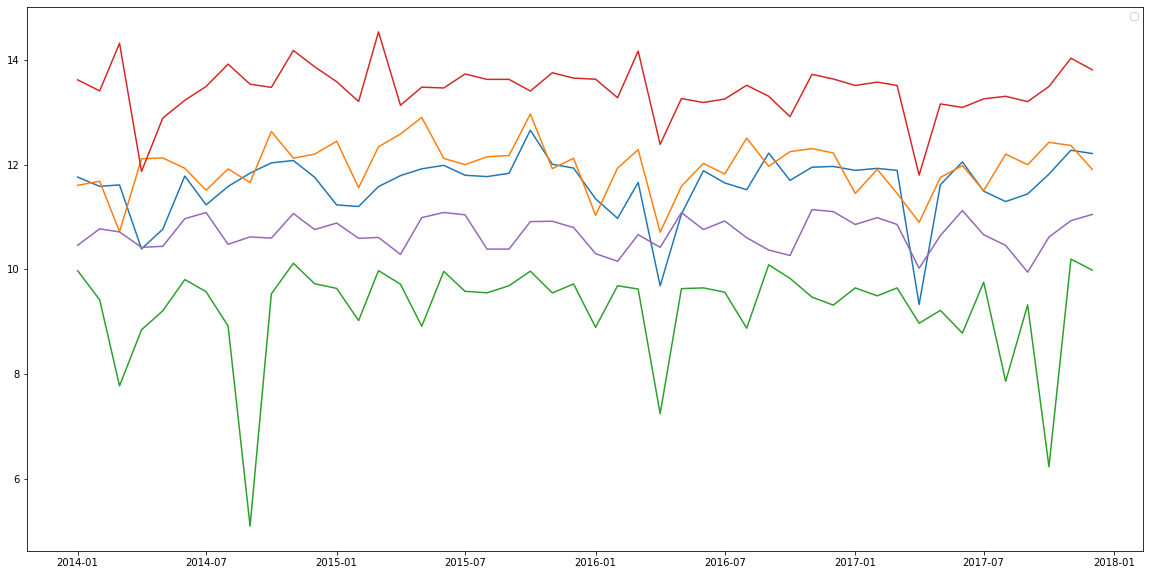

In [211]:
plt.figure(figsize=(20,10))
ts=df_final
ts_log = np.log(ts)
plt.plot(ts_log)
plt.legend()

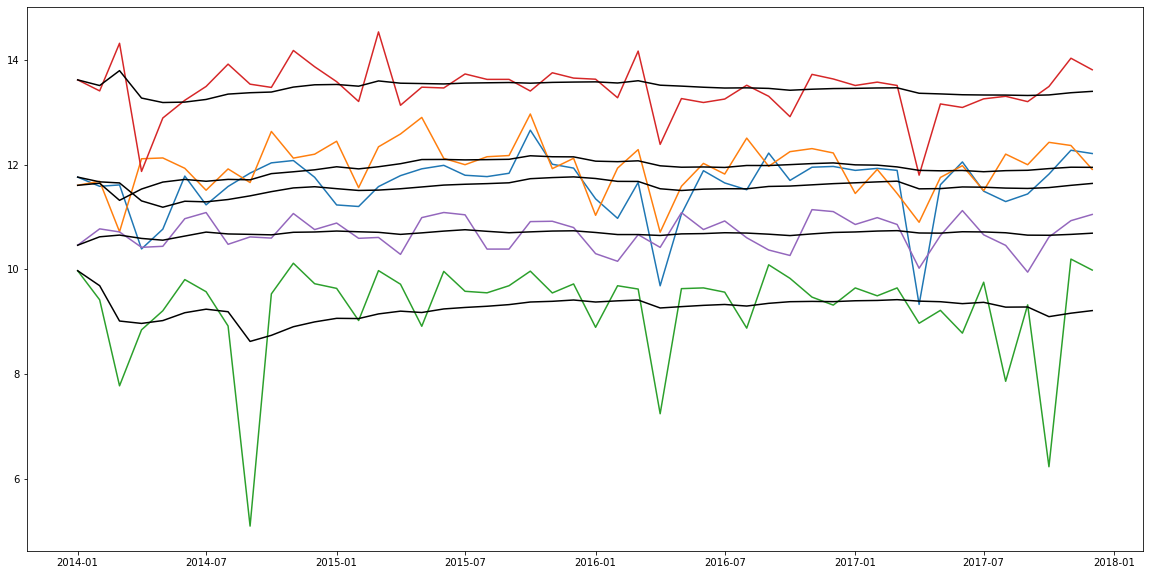

In [51]:
plt.figure(figsize=(20,10))
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='black')

In [52]:
ts_log

,Haryana,Punjab,Himachal Pradesh,Uttar Pradesh,Uttarakhand
date,,,,,
2014-01-01,11.760401,11.603919,9.975700,13.613908,10.461999
2014-02-01,11.584567,11.680617,9.420969,13.403639,10.773845
2014-03-01,11.611348,10.719728,7.781886,14.311330,10.715181
2014-04-01,10.391382,12.109744,8.849339,11.868465,10.421707
2014-05-01,10.768122,12.125562,9.212686,12.886853,10.441356
2014-06-01,11.780539,11.928295,9.806943,13.224671,10.967685
2014-07-01,11.231505,11.510146,9.575652,13.488295,11.084830
2014-08-01,11.581953,11.916335,8.922108,13.913824,10.479385
2014-09-01,11.836694,11.656913,5.108216,13.531694,10.620218


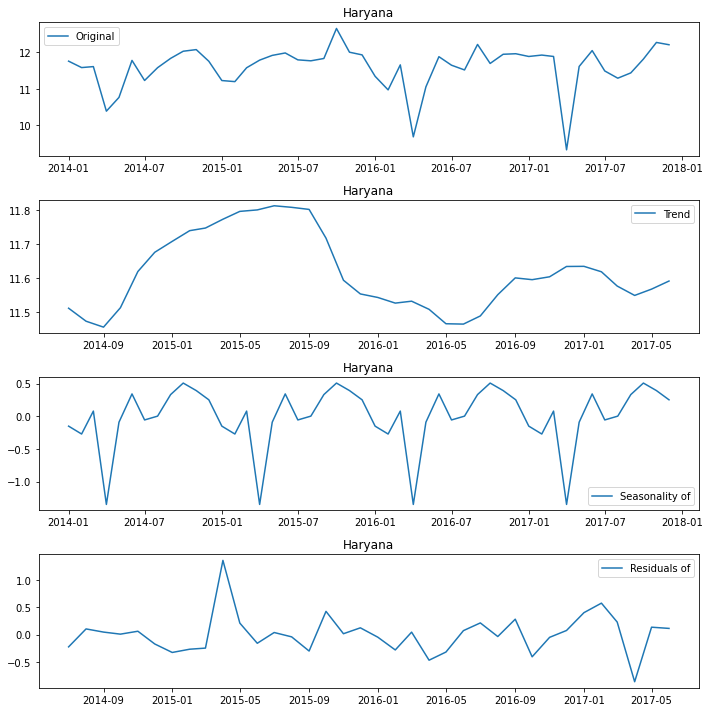

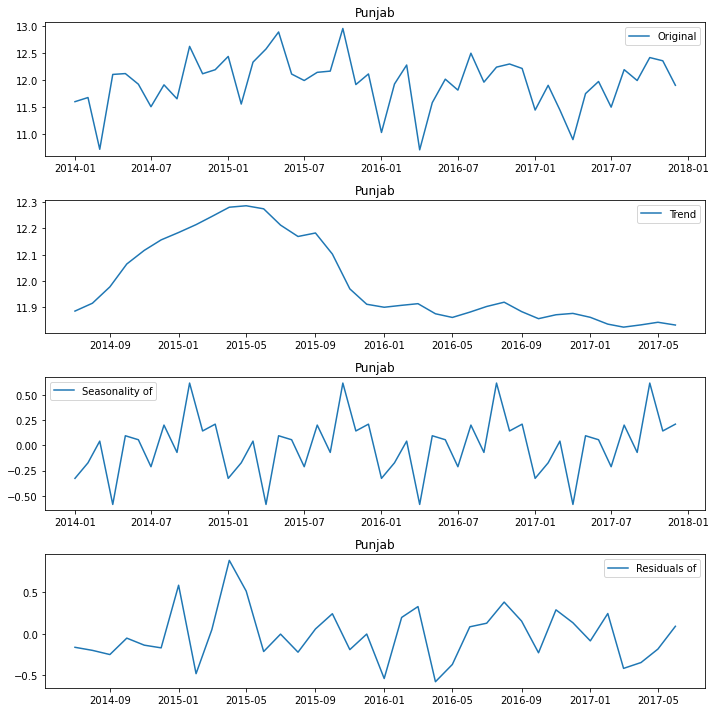

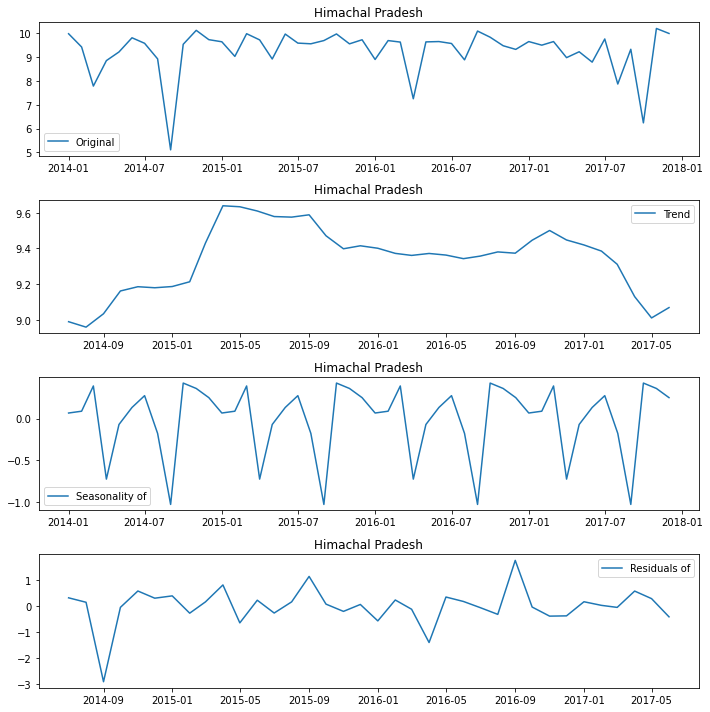

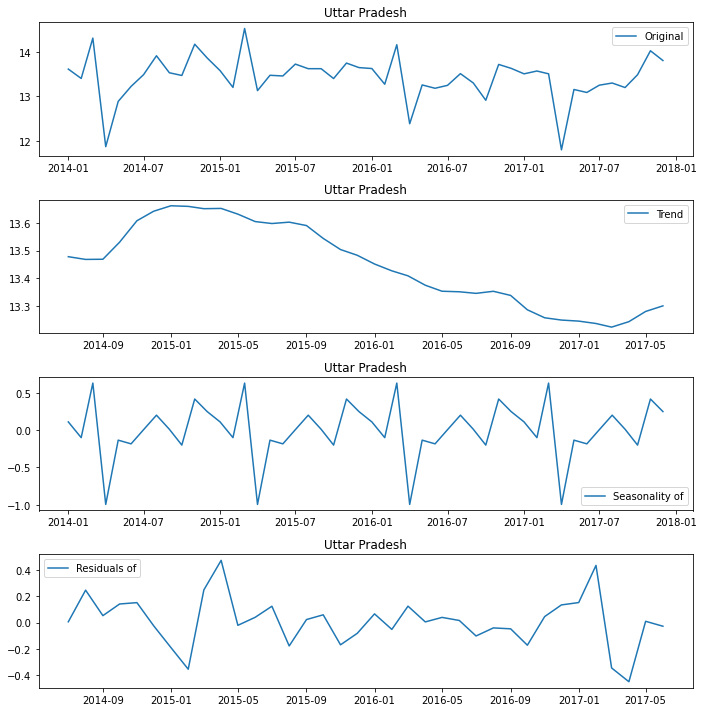

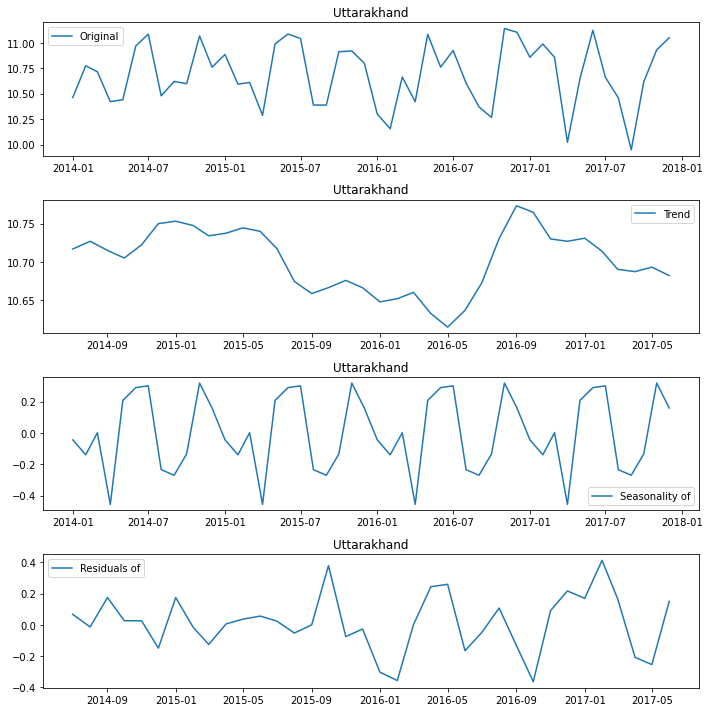

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

for i in ts_log.columns:

    decomposition = seasonal_decompose(ts_log[i])

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(10,10))
    plt.subplot(411)
    plt.plot(ts_log[i], label='Original')
    plt.legend(loc='best')
    plt.title(i)

    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.title(i)

    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality of')
    plt.legend(loc='best')
    plt.title(i)

    plt.subplot(414)
    plt.plot(residual, label='Residuals of')
    plt.legend(loc='best')
    plt.title(i)
    
    plt.tight_layout()

In [54]:
from statsmodels.tsa.stattools import adfuller

In [55]:
error_check=dict()

In [56]:
def test_stationarity(timeseries):
    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original ')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title("Residuals")
    
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test of :') 
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)
    

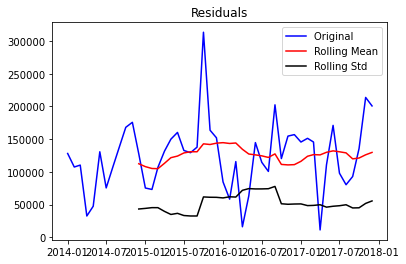

Results of Dickey-Fuller Test of :
Test Statistic                 -4.583324
p-value                         0.000139
#Lags Used                      0.000000
Number of Observations Used    47.000000
dtype: float64


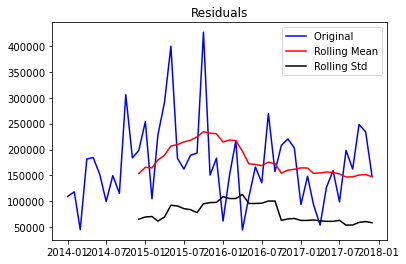

Results of Dickey-Fuller Test of :
Test Statistic                 -5.584832
p-value                         0.000001
#Lags Used                      0.000000
Number of Observations Used    47.000000
dtype: float64


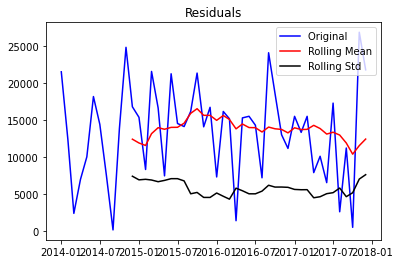

Results of Dickey-Fuller Test of :
Test Statistic                -6.665366e+00
p-value                        4.732586e-09
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
dtype: float64


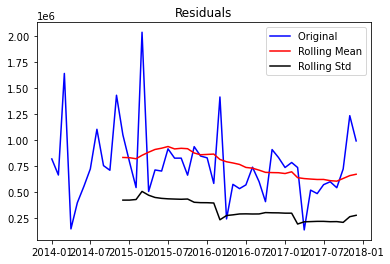

Results of Dickey-Fuller Test of :
Test Statistic                -7.391114e+00
p-value                        7.996271e-11
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
dtype: float64


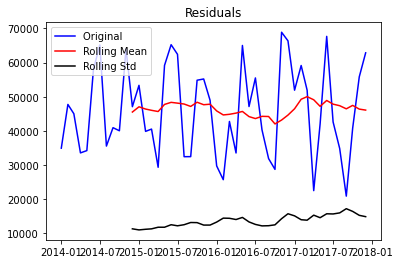

Results of Dickey-Fuller Test of :
Test Statistic                -6.260665e+00
p-value                        4.231197e-08
#Lags Used                     2.000000e+00
Number of Observations Used    4.500000e+01
dtype: float64


In [57]:
for i in ts.columns:
    test_stationarity(ts[i])
    

# with this adf test all of the time series are stationary 

In [58]:
train=ts_log[0:34]
test=ts_log[34:48]

In [59]:
train

,Haryana,Punjab,Himachal Pradesh,Uttar Pradesh,Uttarakhand
date,,,,,
2014-01-01,11.760401,11.603919,9.975700,13.613908,10.461999
2014-02-01,11.584567,11.680617,9.420969,13.403639,10.773845
2014-03-01,11.611348,10.719728,7.781886,14.311330,10.715181
2014-04-01,10.391382,12.109744,8.849339,11.868465,10.421707
2014-05-01,10.768122,12.125562,9.212686,12.886853,10.441356
2014-06-01,11.780539,11.928295,9.806943,13.224671,10.967685
2014-07-01,11.231505,11.510146,9.575652,13.488295,11.084830
2014-08-01,11.581953,11.916335,8.922108,13.913824,10.479385
2014-09-01,11.836694,11.656913,5.108216,13.531694,10.620218


In [60]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

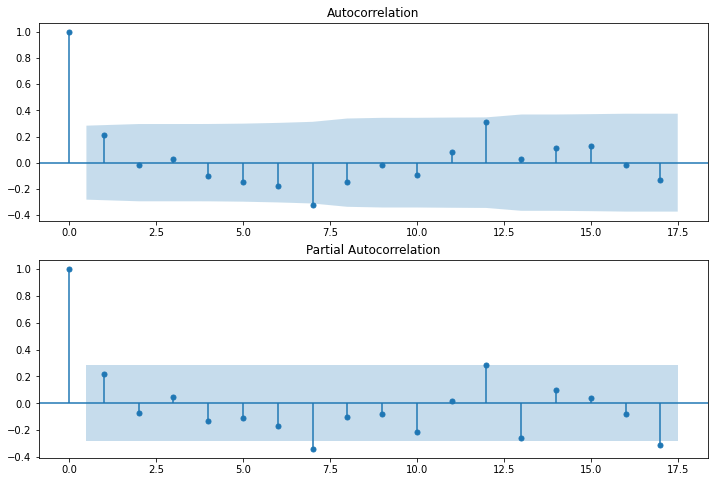

In [61]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(ts_log["Haryana"],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(ts_log["Haryana"],ax=ax2)

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
#!pip install pmdarima

In [64]:
from pmdarima.arima import auto_arima
model_1= auto_arima(train["Haryana"], trace=True, error_action='ignore', suppress_warnings=True)
model_1.fit(train["Haryana"])

forecast_H_1=model_1.predict(n_periods=14)
error_A=np.sqrt(mean_squared_error(test["Haryana"],forecast_H_1))




Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=58.232, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=56.481, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=56.600, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.125, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=58.483, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=58.482, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=60.481, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.225 seconds


In [65]:
error_A

0.6998011057979698

In [66]:
error_check["model_1"]=error_A
error_check

{'model_1': 0.6998011057979698}

# Sarima

In [67]:
#!pip install pyramid_arima

In [71]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train["Haryana"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:257.35720307586587


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:157.10089554715546


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:75.3324341643816
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:47.28628090157233
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:19.132771580334495


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:34.61518457832972
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:50.87352550164568


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:42.762141886326845
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:27.05838212061826


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:13.823482145830644
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:14.554660035754313
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:15.354446500200906


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:17.35444679369636


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:18.53863565292042
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:211.84831111229596
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:127.9009582757941


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:61.85029003883379
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:45.842485465244806
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:19.88322406922104


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:32.606834089412104
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:8.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:53.13699091305056


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:43.587424495280246
ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:27.687228507468046
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:15.805325002883478


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:13.242322688764775
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:6.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:17.267321598012764


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:19.268207426063732


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:13.160146729907172
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:12.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:179.76689680554165


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:109.38999386757794


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:51.09066631778028
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:46.6121871698777


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:20.97978981577242
ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:31.95722399454174
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:52.68685613448708


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:44.214314254331356
ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:26.963727075203522
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:12.52523942578496


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:7.414040156037034
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:10.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:19.57447679299998


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:22.236339247229346
ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:15.72554236539483
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:64.31243699218109
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:45.98085961247455
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:28.43177954475795


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:51.12192502633004
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:23.186081758973636
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:33.12622542772969

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:47.0655097351377

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:46.72010308313757


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:30.358616940464955
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:18.806196656323337
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:20.03563494514135


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 2, 2, 12)12 - AIC:8.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:20.703385200168707
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:22.703385206867775

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:23.9318416581626

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 2, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:58.69838885167587
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:41.89634732261658
ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:25.164704955157244


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:47.20825227741638
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:20.093096718882787
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:8.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:30.28777587822926
ARIMA(0, 1, 1)x(0, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:44.232573738852274

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:41.871538848233584

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:27.15193841564235


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:17.06014035828006
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:16.33087242978204

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 2, 1, 12)12 - AIC:8.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 1, 1)x(1, 2, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:19.03013211642179
ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:21.03013211878826


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:20.058571568429052
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:12.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 1, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(2, 2, 1, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 1, 1)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:53.14945508750192


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:41.842048196848324
ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:20.09820087905308
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:42.22258639973159

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:12.658460018094825


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:21.457702113257426
ARIMA(0, 1, 2)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:45.32413669483178
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:39.53265892048027


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:21.968848010380626


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:13.840696397233291


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:17.02353152628047
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:8.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:15.563428374969309


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:17.563428307945387


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:19.067457809342475
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:12.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:93.56244600469874


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:64.18314319622955
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:33.8131139873551
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:66.86730501550605
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:28.953184129588895

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:35.86009999375284
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:4.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:66.38104723785669
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:65.53401911407633


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:35.7612293094068
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:27.671653956743434
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:26.9288360220909
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:8.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:29.487219677444628
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:31.487219685181152

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:30.103361603817042


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:64.70935405398924
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:47.47104267986451
ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:24.106856093655004
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:50.774100059489236

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:19.28146213367283
ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:8.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:27.656688473397395
ARIMA(0, 2, 1)x(0, 2, 1, 12)12 - AIC:6.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 2, 1)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:51.01606040142508


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:48.12475769650792
ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:25.58656287152359


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:22.236867903239574
ARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:19.508698075064054


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 1)x(1, 2, 1, 12)12 - AIC:8.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 2, 1)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:24.009790732098125


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:26.00979074805442
ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:22.113476680034488


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 2, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(2, 2, 1, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:60.187966723265454


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:44.72764691226738
ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:18.383517683475826


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:47.907381125808925


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:16.3588438364041
ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:nan


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:8.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:49.5687957134388
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:44.61631586671127
ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:19.029808308113875


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:19.104791175013446
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:14.734299969856886

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:8.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:21.05373286161946


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:23.053732835428544


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:17.607636730023383
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:67.29154089511272
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:49.05626635017914
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:32.33515383552225
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:46.757983533176215


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:21.132217998796737
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:35.1988632652703
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:48.69472129227676


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:49.86677344159331
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:34.21933598637797


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:14.551686966607276
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:16.55168055945512


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:8.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:16.517487066035102

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:18.51748706704231


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:20.51748667792572
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(2, 2, 1, 12)12 - AIC:10.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(1, 0, 0)x(2, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:61.69809829059324


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:45.26074940232424


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:27.293852620222772
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:47.59023071733023


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:21.731030430911858
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:34.59970565018082


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 0, 1)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:50.661276250096506

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:45.24673784158112


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:28.40856823507856


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:14.63693304842025


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:11.327269058320544
ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 0, 1)x(1, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:13.788146865104231


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:21.087384146690297


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:23.120407406949276
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:59.60665064788387


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:44.38814283068674


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:25.865768235980433
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:48.45955063648603


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:22.978789575121827
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:33.898588959283956
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:47.140231907425026


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:43.479092455891816
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:26.779145367135463


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:12.288770319627481


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:9.30478543287748
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:13.523123649931541


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:22.01919137449906


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:16.85601820417279
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:62.408825323171854


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:44.321719025271335
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:28.19757526374302
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:50.862605755856436


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:21.35095102404016
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:34.69265681956099
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:6.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:44.29641348039965
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:44.22453911241366

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:30.094055166595354


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:11.45931210741719


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:13.459314320204726
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:8.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:12.791030967432516
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:14.791030966296994


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:16.791030967123646
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:57.47872873300038
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:42.700313752983696


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:27.101958797409978
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:48.303179922057396


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:21.649954088606975
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:32.020363734153115

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:10.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:44.255663362424954


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:43.5361681720282
ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:29.052515779602135


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:9.012975740769026


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:13.12298779549728
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:10.341285912576094


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:12.341285930410063


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:11.453669406081648
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:14.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:12.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:55.00887659655636

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:43.807468443489725
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:20.9372547150797


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:44.163686912345945


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:14.588857264736934
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:12.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:46.25253458819266
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:39.99117264992788


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:22.856159774249917


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:8.534976196748723


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:11.7698119032509
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:10.30631780469157


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:12.306317425356381


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:13.039378133525389
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:83.20563015371158


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:56.80912380044586
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:32.04754137924236
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:61.75572974513857


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:25.2375102758758
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:36.248800578774976
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:6.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:56.778505643960465
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:56.43917373933499

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:33.77474687250248


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:4.444825520543297


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:6.444825464052862
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:8.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(1, 2, 0)x(1, 2, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:5.622785729886133


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:7.622785616794444


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:9.622785729711733
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:12.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(1, 2, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(2, 2, 1, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 2, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:63.6134067242945
ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:45.851238875886885


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:25.21046805106065
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:50.83350517490078
ARIMA(1, 2, 1)x(0, 1, 1, 12)12 - AIC:18.399438963074743

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:29.51093945649397


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 2, 1)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 2, 1)x(0, 2, 2, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:47.27135365094429
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:47.85120772620447


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:26.96023577068395
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:4.791483646467045


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:7.3596863380389435
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:10.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:6.7341668661668885


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:8.734179594445502
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:11.293474278140605
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:61.344323693812086
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:46.55300394108359


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:19.97547309718677
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:49.03638859043354


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:17.837693714536627
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:nan


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:48.49940648187858


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:46.38988144432585


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:20.221443690318523


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:6.558661344631496


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:8.503781006717146
ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:8.316974596762648


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:11.970659606826455


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:14.580362251088975
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:16.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:64.4079478887501
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:47.34156914284568


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:32.273428795352
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:47.591846457545216
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:22.329013156631163

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:34.64744022770511
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:8.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:49.55799520807383


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:46.06369771254086


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:34.219030358843966
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:8.59707091298075


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:10.589787340499129
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:6.535474024442784


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:17.00563353277343


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:19.00563353344552
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:60.59252289043384


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:45.77562459177928


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:28.86944035417301
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:49.53151519790188

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:23.22725225594186
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:36.56418660176544
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:48.88138587115147


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:46.62128280231304


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:29.30341567030351


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:11.049666376420301


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:13.812196347850668
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:10.496888381889963


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:20.715195516258067


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:22.71531086602551
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:14.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:16.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:61.51435644630652


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:46.357531797302556
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:28.13337690649679
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:50.29315335781443


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:23.889282310972355
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:47.538251976506324


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:42.57336761791432


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:28.36724393653637


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:3.524197392832118
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:6.161964025658068
ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:16.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:2.067845169986727


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:14.242161519702918
ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:11.51278916326985
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:16.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:18.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:61.07193642188569
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:44.63738164093786

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:28.691095365446884


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:50.04965201370208
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:23.0613789470863


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:33.03740775809388
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:8.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:43.65195109242694


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:43.46808893949037


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:30.258441090681732


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:3.92263309348243


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:5.9226560376541135
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:10.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 1, 0)x(1, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:5.663914164371446


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:7.66391418432348


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:9.663914183681968
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:62.85292001884877


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:45.37992700983521


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:28.027954341891732
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:50.29734242063798


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:23.819716495032637
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:34.99299328748819
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:45.012905705646524


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:44.833759236769275


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:28.911247797873926


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:3.327502645460184


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:5.328710366027965
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:12.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:5.213786906099801


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:7.213787182249135


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:9.213787024928212
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:16.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:56.724633114608025
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:45.922943113003505


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:22.870385897530873
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:46.13148434879281


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:14.075265435011332
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:22.232154826133076
ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:14.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:46.769847593137214


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:41.95225481566875


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:24.773209617826282


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:6.73474246519643


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:8.655862125351407
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:16.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:7.143684667000439


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:9.143685657246746


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:13.149021894453279
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:14.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:16.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:69.93622062265594
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:51.34909409148545


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:30.17838986338477
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:54.111369465751565
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:27.4515193194177


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:29.128465881536744
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:10.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:49.6465897827836


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:50.34656933203603
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:30.797389678027592

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:6.462951215900944


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:8.46286930720557
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:10.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(2, 2, 0)x(1, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:7.952539783082553


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:9.952544105100472
ARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:11.952538726899114
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:14.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(2, 2, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(2, 2, 1, 12)12 - AIC:12.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:65.70523301903378
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:46.326342147026175


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:26.550992598255156
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:52.161155465830966


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:20.560500635119674
ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:30.32031109916396
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V

ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:46.32900231209768
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:47.87670829479671


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:28.492745067927512


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:7.213581542376138


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:9.213559702566059
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:12.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: V


ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:7.106252690188889


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:28.5060872687523


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:30.507527187422983
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:16.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:63.85898556887692
ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:46.97323883328668


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:19.442329318676524
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:51.97319014094286


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:18.540993922841377
ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:nan


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:48.188590839225625


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:47.853545266821136


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:-24.290506266675713
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:9.160445447377699


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:10.493162384346938
ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:16.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:12.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:16.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:7.004844996728325
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:9.004549461616104


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:14.150935671949242
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:16.0

C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:18.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: Convergen

ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:14.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:18.0


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [70]:
import statsmodels.api as sm

In [113]:
model_S=sm.tsa.statespace.SARIMAX(train["Haryana"],order=(1,0,1),seasonal_order=(1,0,2,12))
result=model_S.fit()
pred_S=result.predict(start=34,end=47,dynamic=True)
error_S=np.sqrt(mean_squared_error(test["Haryana"],pred_S))
error_S


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


0.5985717357871598

In [114]:
error_check["model_S"]=error_S

# FB Prophet

In [74]:
fb=pd.DataFrame()

In [75]:
fb["ds"]=ts_log.index

In [76]:
fb["y"]=ts_log["Haryana"].values

In [77]:
fb

,ds,y
0,2014-01-01,11.760401
1,2014-02-01,11.584567
2,2014-03-01,11.611348
3,2014-04-01,10.391382
4,2014-05-01,10.768122
5,2014-06-01,11.780539
6,2014-07-01,11.231505
7,2014-08-01,11.581953
8,2014-09-01,11.836694
9,2014-10-01,12.031987


In [78]:
from fbprophet import Prophet
model_P=Prophet()
model_P.fit(fb[0:34])
model_P.component_modes

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [79]:
test_fb=pd.DataFrame(fb[34:48]["ds"],columns=["ds"])

In [80]:
test_fb

,ds
34,2016-11-01
35,2016-12-01
36,2017-01-01
37,2017-02-01
38,2017-03-01
39,2017-04-01
40,2017-05-01
41,2017-06-01
42,2017-07-01
43,2017-08-01


In [81]:
prediction=model_P.predict(test_fb)

In [82]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-11-01,11.068046,11.175376,11.605964,11.066893,11.069371,0.342164,0.342164,0.342164,0.342164,0.342164,0.342164,0.0,0.0,0.0,11.410210
1,2016-12-01,11.038047,10.151116,10.576826,11.033670,11.042936,-0.673038,-0.673038,-0.673038,-0.673038,-0.673038,-0.673038,0.0,0.0,0.0,10.365009
2,2017-01-01,11.007048,11.592347,12.014047,10.997422,11.015629,0.800707,0.800707,0.800707,0.800707,0.800707,0.800707,0.0,0.0,0.0,11.807755
3,2017-02-01,10.976049,11.636297,12.051203,10.960358,10.990209,0.854852,0.854852,0.854852,0.854852,0.854852,0.854852,0.0,0.0,0.0,11.830901
4,2017-03-01,10.948050,11.100002,11.523299,10.925443,10.968527,0.372827,0.372827,0.372827,0.372827,0.372827,0.372827,0.0,0.0,0.0,11.320877
5,2017-04-01,10.917051,9.659308,10.085180,10.886500,10.944921,-1.044133,-1.044133,-1.044133,-1.044133,-1.044133,-1.044133,0.0,0.0,0.0,9.872918
6,2017-05-01,10.887053,10.576461,10.998600,10.847712,10.924156,-0.113672,-0.113672,-0.113672,-0.113672,-0.113672,-0.113672,0.0,0.0,0.0,10.773380
7,2017-06-01,10.856054,11.303498,11.743335,10.805997,10.902828,0.660254,0.660254,0.660254,0.660254,0.660254,0.660254,0.0,0.0,0.0,11.516307
8,2017-07-01,10.826055,10.954233,11.382198,10.766477,10.882861,0.335500,0.335500,0.335500,0.335500,0.335500,0.335500,0.0,0.0,0.0,11.161555
9,2017-08-01,10.795056,10.929891,11.383502,10.725372,10.861016,0.356113,0.356113,0.356113,0.356113,0.356113,0.356113,0.0,0.0,0.0,11.151169


<AxesSubplot:label='08f7d1a2-6b7c-487f-b747-65ce61d71c21', xlabel='ds'>

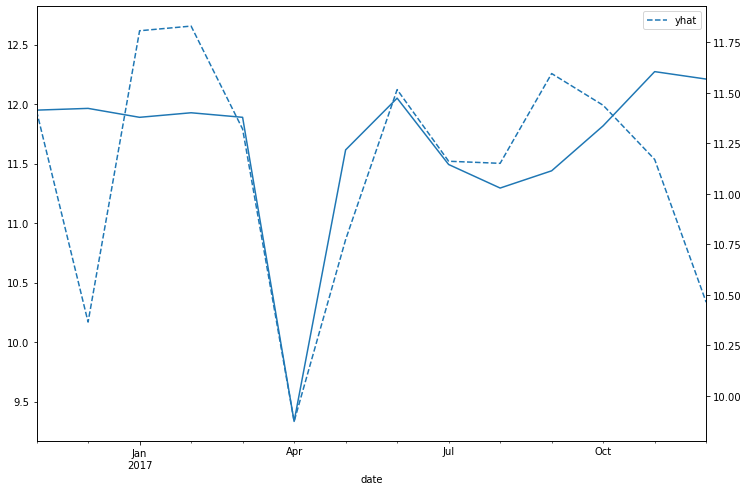

In [83]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ts_log["Haryana"].plot(figsize=(12,8),ax=ax)

prediction[["yhat"]].set_index(prediction["ds"]).plot(ax=ax2,ls="--")


In [84]:
prediction[["yhat"]].values

array([[11.41021004],
       [10.36500862],
       [11.80775545],
       [11.83090087],
       [11.32087738],
       [ 9.87291814],
       [10.77338043],
       [11.51630733],
       [11.16155508],
       [11.15116945],
       [11.59580786],
       [11.43859527],
       [11.17036494],
       [10.46343254]])

In [85]:
error_P=np.sqrt(mean_squared_error(fb[34:48]["y"],prediction[["yhat"]]))
error_P



0.8030432340016953

In [86]:
error_check["model_P"]=error_P

# LSTM

In [87]:
#!pip install keras
#!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [88]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [89]:
X,y=prepare_data(train["Haryana"],2)

In [90]:
X

array([[11.76040113, 11.58456738],
       [11.58456738, 11.6113483 ],
       [11.6113483 , 10.39138206],
       [10.39138206, 10.76812156],
       [10.76812156, 11.78053889],
       [11.78053889, 11.23150475],
       [11.23150475, 11.58195262],
       [11.58195262, 11.83669385],
       [11.83669385, 12.03198726],
       [12.03198726, 12.07659514],
       [12.07659514, 11.75710183],
       [11.75710183, 11.22979143],
       [11.22979143, 11.20012741],
       [11.20012741, 11.57967454],
       [11.57967454, 11.78843814],
       [11.78843814, 11.91817985],
       [11.91817985, 11.9845889 ],
       [11.9845889 , 11.79579844],
       [11.79579844, 11.76990437],
       [11.76990437, 11.83337078],
       [11.83337078, 12.6549851 ],
       [12.6549851 , 12.00530277],
       [12.00530277, 11.93211003],
       [11.93211003, 11.34609212],
       [11.34609212, 10.97428584],
       [10.97428584, 11.65866252],
       [11.65866252,  9.68851583],
       [ 9.68851583, 11.05659797],
       [11.05659797,

In [91]:
y

array([11.6113483 , 10.39138206, 10.76812156, 11.78053889, 11.23150475,
       11.58195262, 11.83669385, 12.03198726, 12.07659514, 11.75710183,
       11.22979143, 11.20012741, 11.57967454, 11.78843814, 11.91817985,
       11.9845889 , 11.79579844, 11.76990437, 11.83337078, 12.6549851 ,
       12.00530277, 11.93211003, 11.34609212, 10.97428584, 11.65866252,
        9.68851583, 11.05659797, 11.88250481, 11.64918908, 11.51977515,
       12.21808508, 11.69763492])

In [92]:
X.shape

(32, 2)

In [93]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [94]:
X

array([[[11.76040113],
        [11.58456738]],

       [[11.58456738],
        [11.6113483 ]],

       [[11.6113483 ],
        [10.39138206]],

       [[10.39138206],
        [10.76812156]],

       [[10.76812156],
        [11.78053889]],

       [[11.78053889],
        [11.23150475]],

       [[11.23150475],
        [11.58195262]],

       [[11.58195262],
        [11.83669385]],

       [[11.83669385],
        [12.03198726]],

       [[12.03198726],
        [12.07659514]],

       [[12.07659514],
        [11.75710183]],

       [[11.75710183],
        [11.22979143]],

       [[11.22979143],
        [11.20012741]],

       [[11.20012741],
        [11.57967454]],

       [[11.57967454],
        [11.78843814]],

       [[11.78843814],
        [11.91817985]],

       [[11.91817985],
        [11.9845889 ]],

       [[11.9845889 ],
        [11.79579844]],

       [[11.79579844],
        [11.76990437]],

       [[11.76990437],
        [11.83337078]],

       [[11.83337078],
        [12.65498

In [95]:
model_L = Sequential()
model_L.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(2,1)))
model_L.add(LSTM(30, activation='relu'))
model_L.add(Dense(1))
model_L.compile(optimizer='adam', loss='mse')
# fit model
model_L.fit(X, y, epochs=300, verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/300
32/32 [==============================] - 16s 508ms/sample - loss: 133.9495
Epoch 2/300
32/32 [==============================] - 0s 124us/sample - loss: 133.4711
Epoch 3/300
32/32 [==============================] - 0s 327us/sample - loss: 132.9732
Epoch 4/300
32/32 [==============================] - 0s 125us/sample - loss: 132.4690
Epoch 5/300
32/32 [==============================] - 0s 250us/sample - loss: 131.9619
Epoch 6/300
32/32 [==============================] - 0s 250us/sample - loss: 131.4518
Epoch 7/300
32/32 [==============================] - 0s 250us/sample - loss: 130.9434
Epoch 8/300
32/32 [==============================] - 0s 250us/sample - loss: 130.4355
Epoch 9/300
32/32 [==============================] - 0s 235us/sample - loss: 129.9266
Epoch 10/300
32/32 [==============================] - 0s 160us/sample - loss: 129.4099
Epoch 11/300
32/32 [==============================] - 0s 250us/sample - loss: 128.8823
Epoch 12/300
32/32 [==============================]

Epoch 97/300
32/32 [==============================] - 0s 275us/sample - loss: 0.7768
Epoch 98/300
32/32 [==============================] - 0s 396us/sample - loss: 0.7205
Epoch 99/300
32/32 [==============================] - 0s 250us/sample - loss: 0.6677
Epoch 100/300
32/32 [==============================] - 0s 250us/sample - loss: 0.6211
Epoch 101/300
32/32 [==============================] - 0s 271us/sample - loss: 0.5824
Epoch 102/300
32/32 [==============================] - 0s 269us/sample - loss: 0.5524
Epoch 103/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5313
Epoch 104/300
32/32 [==============================] - 0s 375us/sample - loss: 0.5183
Epoch 105/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5126
Epoch 106/300
32/32 [==============================] - 0s 270us/sample - loss: 0.5129
Epoch 107/300
32/32 [==============================] - 0s 271us/sample - loss: 0.5182
Epoch 108/300
32/32 [==============================] - 0s

Epoch 193/300
32/32 [==============================] - 0s 125us/sample - loss: 0.5011
Epoch 194/300
32/32 [==============================] - 0s 270us/sample - loss: 0.5010
Epoch 195/300
32/32 [==============================] - 0s 381us/sample - loss: 0.5008
Epoch 196/300
32/32 [==============================] - 0s 375us/sample - loss: 0.5007
Epoch 197/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5006
Epoch 198/300
32/32 [==============================] - 0s 270us/sample - loss: 0.5005
Epoch 199/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5004
Epoch 200/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5003
Epoch 201/300
32/32 [==============================] - 0s 268us/sample - loss: 0.5002
Epoch 202/300
32/32 [==============================] - 0s 397us/sample - loss: 0.5001
Epoch 203/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4999
Epoch 204/300
32/32 [==============================] -

Epoch 289/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4907
Epoch 290/300
32/32 [==============================] - 0s 271us/sample - loss: 0.4906
Epoch 291/300
32/32 [==============================] - 0s 255us/sample - loss: 0.4905
Epoch 292/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4904
Epoch 293/300
32/32 [==============================] - 0s 249us/sample - loss: 0.4903
Epoch 294/300
32/32 [==============================] - 0s 315us/sample - loss: 0.4902
Epoch 295/300
32/32 [==============================] - 0s 125us/sample - loss: 0.4901
Epoch 296/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4901
Epoch 297/300
32/32 [==============================] - 0s 268us/sample - loss: 0.4900
Epoch 298/300
32/32 [==============================] - 0s 270us/sample - loss: 0.4899
Epoch 299/300
32/32 [==============================] - 0s 125us/sample - loss: 0.4898
Epoch 300/300
32/32 [==============================] -

In [96]:
X_test,y_test=prepare_data(test["Haryana"],2)

In [97]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [98]:
y_test

array([11.88849646, 11.9267185 , 11.88849646,  9.33336166, 11.6148047 ,
       12.04952172, 11.49205866, 11.2942361 , 11.43911739, 11.81717446,
       12.2723809 , 12.20973356])

In [99]:
# make prediction
testPredict = model_L.predict(X_test)

In [100]:
error_LSTM=np.sqrt(mean_squared_error(y_test,testPredict))
error_LSTM


1.099888613696363

In [101]:
error_check["model_L"]=error_LSTM

In [119]:
error_check

{'model_1': 0.6998011057979698,
 'model_S': 0.5985717357871598,
 'model_P': 0.8030432340016953,
 'model_L': 1.099888613696363}

In [117]:
min(error_check)

'model_1'

In [104]:
# so model_1 i.e arima model has lowest error rate so we use arima model for state haryana for future prediction 

In [118]:
model_S=sm.tsa.statespace.SARIMAX(ts_log["Haryana"],order=(1,0,1),seasonal_order=(1,0,2,12))
result=model_S.fit()
pred_S=result.predict(start=48,end=62,dynamic=True)


C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\VERSHA TYAGI\anaconda3\envs\tensorflow_2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [157]:
np.exp(pred_S)

2018-01-01    228061.040471
2018-02-01    151055.910688
2018-03-01    159713.139763
2018-04-01    202882.292448
2018-05-01    210265.965172
2018-06-01    164093.055184
2018-07-01    156387.246671
2018-08-01    148505.480078
2018-09-01    178572.181057
2018-10-01    191860.466534
2018-11-01    154896.227646
2018-12-01    141205.992598
2019-01-01    156120.598342
2019-02-01    177126.502764
2019-03-01    179344.932486
Freq: MS, Name: predicted_mean, dtype: float64

# for PUNJAB

## Arima model

In [121]:
error_check=dict()

In [123]:
import statsmodels

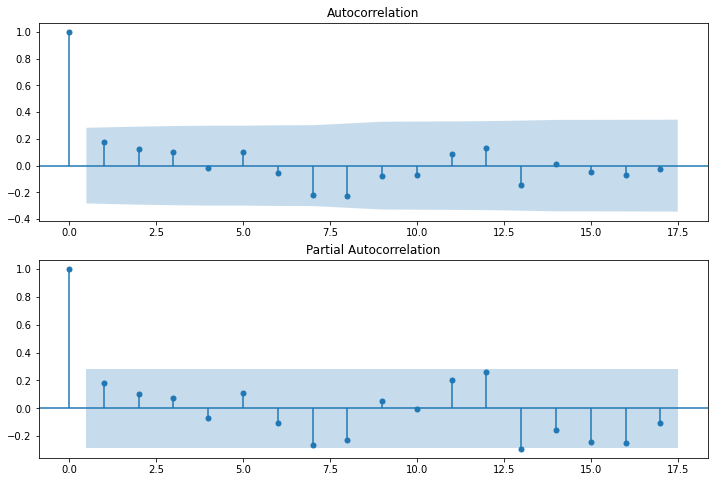

In [126]:
fig_P = plt.figure(figsize=(12,8))
ax1 = fig_P.add_subplot(211)
fig_P1= statsmodels.graphics.tsaplots.plot_acf(ts_log["Punjab"],ax=ax1)
ax2 = fig_P.add_subplot(212)
fig_P2= statsmodels.graphics.tsaplots.plot_pacf(ts_log["Punjab"],ax=ax2)

In [127]:
from pmdarima.arima import auto_arima
model_1= auto_arima(train["Punjab"], trace=True, error_action='ignore', suppress_warnings=True)
model_1.fit(train["Punjab"])

forecast_H_1=model_1.predict(n_periods=14)
error_A=np.sqrt(mean_squared_error(test["Punjab"],forecast_H_1))


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=61.012, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=53.800, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55.315, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55.392, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=267.448, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=57.074, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.781 seconds


In [128]:
error_check["error_Arima"]=error_A
error_check

{'error_Arima': 0.43068935884147685}

## Sarima model

In [ ]:
import warnings

In [131]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train["Punjab"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:259.70517247493535
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:158.4539642496956
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:76.12588962265119
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:50.34097728353465
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:23.76321951816872
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:32.161602680520645
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:54.82225212519634
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:52.094442359759356
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:27.165866600873848
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:26.30411048738783
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:25.716685140486327
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:27.481311904778902
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:29.4813120

ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:26.97005682914372
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:68.47623377950981
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:66.02093024418204
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:31.19605478311549
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:32.30635070265363
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:28.01305755623283
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:31.704735373587006
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:33.70473537398401
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:31.38402551134256
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2

ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:26.46454233977614
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:28.464542725033276
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:21.309219659582723
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:23.309219650756987
ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:25.309219650612018
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:54.01051046501473
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:39.24758847690039
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:22.47067149629373
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:46.29135989947294
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:24.607961352283045
ARIMA(1, 1, 1)x(0, 1, 2, 12)1

ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:23.56178216326296
ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:25.56178233620468
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:58.88747679792886
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:43.21057555983499
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:24.774489759547535
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:50.48629376628869
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:28.358690219867086
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:26.88956808192838
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:49.839243948707484
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:45.20893851568515
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:21.301735143928745
ARIMA(2, 0, 1

ARIMA(2, 2, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:61.05616527293078
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:42.50622492897836
ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:17.315481124111425
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:49.77479026564407
ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:22.22375294665292
ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:24.57948206507945
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:45.238452901087584
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:45.12615011118897
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:13.317553890047385
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:18.77604644824921
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:20.765547950297737
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1

In [150]:
model_S=sm.tsa.statespace.SARIMAX(train["Punjab"],order=(1,0,2),seasonal_order=(1,0,2,12))
result=model_S.fit()
pred_S=result.predict(start=34,end=47,dynamic=True)
error_S=np.sqrt(mean_squared_error(test["Punjab"],pred_S))
error_S



0.4061013916478605

In [151]:
error_check["error_S"]=error_S

## FB prophet model

In [140]:
fb=pd.DataFrame()
fb["ds"]=ts_log.index
fb["y"]=ts_log["Punjab"].values

In [141]:

model_P=Prophet()
model_P.fit(fb[0:34])

test_fb=pd.DataFrame(fb[34:48]["ds"],columns=["ds"])

prediction=model_P.predict(test_fb)

error_P=np.sqrt(mean_squared_error(fb[34:48]["y"],prediction[["yhat"]]))
error_check["error_P"]=error_P

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [142]:
error_P

0.7788718568221656

## LSTM 

In [143]:
X,y=prepare_data(train["Punjab"],2)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [144]:
model_L = Sequential()
model_L.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(2,1)))
model_L.add(LSTM(30, activation='relu'))
model_L.add(Dense(1))
model_L.compile(optimizer='adam', loss='mse')
# fit model
model_L.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
32/32 [==============================] - 2s 57ms/sample - loss: 141.1906
Epoch 2/300
32/32 [==============================] - 0s 281us/sample - loss: 140.6824
Epoch 3/300
32/32 [==============================] - 0s 312us/sample - loss: 140.1316
Epoch 4/300
32/32 [==============================] - 0s 281us/sample - loss: 139.5632
Epoch 5/300
32/32 [==============================] - 0s 219us/sample - loss: 138.9772
Epoch 6/300
32/32 [==============================] - 0s 187us/sample - loss: 138.3727
Epoch 7/300
32/32 [==============================] - 0s 281us/sample - loss: 137.7482
Epoch 8/300
32/32 [==============================] - 0s 219us/sample - loss: 137.1015
Epoch 9/300
32/32 [==============================] - 0s 250us/sample - loss: 136.4294
Epoch 10/300
32/32 [==============================] - 0s 219us/sample - loss: 135.7305
Epoch 11/300
32/32 [==============================] - 0s 219us/sample - loss: 135.0018
Epoch 12/300
32/32 [==============================] -

Epoch 97/300
32/32 [==============================] - 0s 281us/sample - loss: 0.7531
Epoch 98/300
32/32 [==============================] - 0s 375us/sample - loss: 0.7210
Epoch 99/300
32/32 [==============================] - 0s 312us/sample - loss: 0.7006
Epoch 100/300
32/32 [==============================] - 0s 219us/sample - loss: 0.6918
Epoch 101/300
32/32 [==============================] - 0s 219us/sample - loss: 0.6926
Epoch 102/300
32/32 [==============================] - 0s 250us/sample - loss: 0.7001
Epoch 103/300
32/32 [==============================] - 0s 344us/sample - loss: 0.7112
Epoch 104/300
32/32 [==============================] - 0s 281us/sample - loss: 0.7228
Epoch 105/300
32/32 [==============================] - 0s 219us/sample - loss: 0.7326
Epoch 106/300
32/32 [==============================] - 0s 281us/sample - loss: 0.7389
Epoch 107/300
32/32 [==============================] - 0s 281us/sample - loss: 0.7408
Epoch 108/300
32/32 [==============================] - 0s

Epoch 193/300
32/32 [==============================] - 0s 219us/sample - loss: 0.6475
Epoch 194/300
32/32 [==============================] - 0s 281us/sample - loss: 0.6471
Epoch 195/300
32/32 [==============================] - 0s 281us/sample - loss: 0.6466
Epoch 196/300
32/32 [==============================] - 0s 219us/sample - loss: 0.6462
Epoch 197/300
32/32 [==============================] - 0s 219us/sample - loss: 0.6457
Epoch 198/300
32/32 [==============================] - 0s 250us/sample - loss: 0.6453
Epoch 199/300
32/32 [==============================] - 0s 312us/sample - loss: 0.6449
Epoch 200/300
32/32 [==============================] - 0s 344us/sample - loss: 0.6445
Epoch 201/300
32/32 [==============================] - 0s 281us/sample - loss: 0.6440
Epoch 202/300
32/32 [==============================] - 0s 250us/sample - loss: 0.6436
Epoch 203/300
32/32 [==============================] - 0s 219us/sample - loss: 0.6432
Epoch 204/300
32/32 [==============================] -

Epoch 289/300
32/32 [==============================] - 0s 281us/sample - loss: 0.6039
Epoch 290/300
32/32 [==============================] - 0s 312us/sample - loss: 0.6032
Epoch 291/300
32/32 [==============================] - 0s 344us/sample - loss: 0.6026
Epoch 292/300
32/32 [==============================] - 0s 250us/sample - loss: 0.6020
Epoch 293/300
32/32 [==============================] - 0s 281us/sample - loss: 0.6013
Epoch 294/300
32/32 [==============================] - 0s 281us/sample - loss: 0.6007
Epoch 295/300
32/32 [==============================] - 0s 312us/sample - loss: 0.6000
Epoch 296/300
32/32 [==============================] - 0s 281us/sample - loss: 0.5993
Epoch 297/300
32/32 [==============================] - 0s 281us/sample - loss: 0.5986
Epoch 298/300
32/32 [==============================] - 0s 281us/sample - loss: 0.5979
Epoch 299/300
32/32 [==============================] - 0s 344us/sample - loss: 0.5972
Epoch 300/300
32/32 [==============================] -

In [145]:
X_test,y_test=prepare_data(test["Punjab"],2)
n_features = 1
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

testPredict = model_L.predict(X_test)
error_LSTM=np.sqrt(mean_squared_error(y_test,testPredict))
error_LSTM
error_check["error_LSTM"]=error_LSTM

In [152]:
error_check

{'error_Arima': 0.43068935884147685,
 'error_S': 0.4061013916478605,
 'error_P': 0.7788718568221656,
 'error_LSTM': 0.6473370831207359}

In [153]:
# for Sarima model error rate is the least so we use sarima model to predict future data for Punjab

In [154]:
model_S=sm.tsa.statespace.SARIMAX(ts_log["Punjab"],order=(1,0,2),seasonal_order=(1,0,2,12))
result=model_S.fit()
pred_S=result.predict(start=48,end=62,dynamic=True)


In [158]:
np.exp(pred_S)

2018-01-01    228061.040471
2018-02-01    151055.910688
2018-03-01    159713.139763
2018-04-01    202882.292448
2018-05-01    210265.965172
2018-06-01    164093.055184
2018-07-01    156387.246671
2018-08-01    148505.480078
2018-09-01    178572.181057
2018-10-01    191860.466534
2018-11-01    154896.227646
2018-12-01    141205.992598
2019-01-01    156120.598342
2019-02-01    177126.502764
2019-03-01    179344.932486
Freq: MS, Name: predicted_mean, dtype: float64

# for UTTAR PRADESH

## Arima model

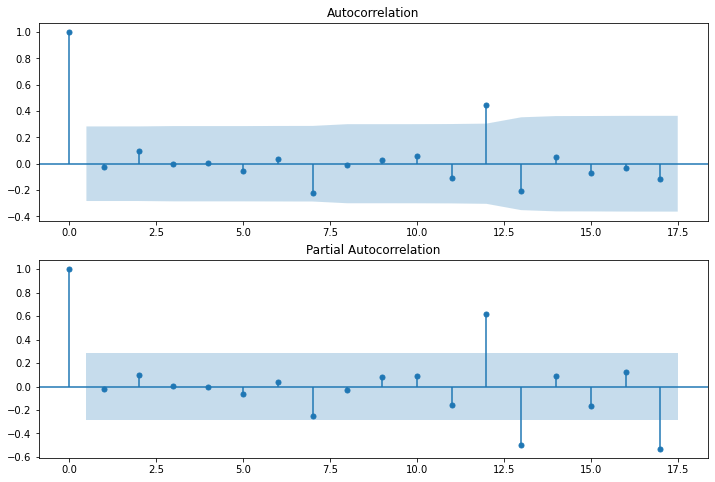

In [161]:
error_check=dict()
fig_UP = plt.figure(figsize=(12,8))
ax1 = fig_UP.add_subplot(211)
fig_UP1= statsmodels.graphics.tsaplots.plot_acf(ts_log["Uttar Pradesh"],ax=ax1)
ax2 = fig_UP.add_subplot(212)
fig_UP2= statsmodels.graphics.tsaplots.plot_pacf(ts_log["Uttar Pradesh"],ax=ax2)

In [162]:
model_1= auto_arima(train["Uttar Pradesh"], trace=True, error_action='ignore', suppress_warnings=True)
model_1.fit(train["Uttar Pradesh"])

forecast_H_1=model_1.predict(n_periods=14)
error_A=np.sqrt(mean_squared_error(test["Uttar Pradesh"],forecast_H_1))

error_check["error_Arima"]=error_A
error_check

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=59.886, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=52.685, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=54.151, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=54.236, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=275.332, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55.966, Time=0.31 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.016 seconds


{'error_Arima': 0.5138583614492623}

## Sarima model

In [163]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train["Uttar Pradesh"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:267.2715673023234
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:163.16567018189087
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:78.05717494815586
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:26.04880201789324
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5.9778822130178
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:24.247362966729078
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:27.405880899693987
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:23.29434461584357
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:6.4968488918536025
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.914226074385018
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7.760847927790063
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:-1.246819578928255
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:0.75318183730

ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:25.6743780828916
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:36.42171888501186
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:28.733490467291073
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:17.918844328736753
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:4.51870094701279
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:7.073210388436204
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:4.0062961181116705
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:6.006296183316219
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:8.982015788634504
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2

ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1.7595409142619234
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:3.759540511173025
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:1.8717096336740937
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:3.8717096424915285
ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:5.8717096301506
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:53.67082316735774
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:16.296061835906777
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:18.74709316205722
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:22.817657308756207
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2.567611380472128
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 

ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:4.08175453602513
ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:6.08175463499725
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:58.279735244193176
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:22.642738516269425
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:22.502880460378986
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:19.88387047116713
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:1.3975040365946043
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:24.279625262156614
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:14.866401578601959
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:13.21378704572094
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:1.7902251013819814
ARIMA(2, 0, 

ARIMA(2, 2, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:56.256047487915566
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:19.21612166018284
ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:16.238509141123572
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:23.919849862054654
ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:-9.661271874819931
ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:18.646546443256323
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:18.584958181307243
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:15.926962913943704
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:9.260210989895691
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:-10.61710046147515
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:-8.617137538804876
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2,

In [164]:
model_S=sm.tsa.statespace.SARIMAX(train["Uttar Pradesh"],order=(1,0,1),seasonal_order=(1,0,1,12))
result=model_S.fit()
pred_S=result.predict(start=34,end=47,dynamic=True)
error_S=np.sqrt(mean_squared_error(test["Uttar Pradesh"],pred_S))
error_S

error_check["error_S"]=error_S

In [165]:
error_S

0.3187123188907323

## FB prophet model

In [166]:
fb=pd.DataFrame()
fb["ds"]=ts_log.index
fb["y"]=ts_log["Uttar Pradesh"].values

In [167]:
model_P=Prophet()
model_P.fit(fb[0:34])

test_fb=pd.DataFrame(fb[34:48]["ds"],columns=["ds"])

prediction=model_P.predict(test_fb)

error_P=np.sqrt(mean_squared_error(fb[34:48]["y"],prediction[["yhat"]]))
error_check["error_P"]=error_P

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## LSTM model

In [168]:
X,y=prepare_data(train["Uttar Pradesh"],2)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [169]:
model_L = Sequential()
model_L.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(2,1)))
model_L.add(LSTM(30, activation='relu'))
model_L.add(Dense(1))
model_L.compile(optimizer='adam', loss='mse')
# fit model
model_L.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
32/32 [==============================] - 3s 79ms/sample - loss: 175.5030
Epoch 2/300
32/32 [==============================] - 0s 281us/sample - loss: 174.3570
Epoch 3/300
32/32 [==============================] - 0s 250us/sample - loss: 173.2020
Epoch 4/300
32/32 [==============================] - 0s 250us/sample - loss: 172.0375
Epoch 5/300
32/32 [==============================] - 0s 219us/sample - loss: 170.8635
Epoch 6/300
32/32 [==============================] - 0s 250us/sample - loss: 169.6694
Epoch 7/300
32/32 [==============================] - 0s 219us/sample - loss: 168.4493
Epoch 8/300
32/32 [==============================] - 0s 219us/sample - loss: 167.2014
Epoch 9/300
32/32 [==============================] - 0s 219us/sample - loss: 165.9224
Epoch 10/300
32/32 [==============================] - 0s 219us/sample - loss: 164.6021
Epoch 11/300
32/32 [==============================] - 0s 281us/sample - loss: 163.2311
Epoch 12/300
32/32 [==============================] -

Epoch 97/300
32/32 [==============================] - 0s 219us/sample - loss: 0.6855
Epoch 98/300
32/32 [==============================] - 0s 250us/sample - loss: 0.6614
Epoch 99/300
32/32 [==============================] - 0s 250us/sample - loss: 0.6371
Epoch 100/300
32/32 [==============================] - 0s 250us/sample - loss: 0.6149
Epoch 101/300
32/32 [==============================] - 0s 219us/sample - loss: 0.5965
Epoch 102/300
32/32 [==============================] - 0s 312us/sample - loss: 0.5828
Epoch 103/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5742
Epoch 104/300
32/32 [==============================] - 0s 219us/sample - loss: 0.5704
Epoch 105/300
32/32 [==============================] - 0s 344us/sample - loss: 0.5704
Epoch 106/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5732
Epoch 107/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5775
Epoch 108/300
32/32 [==============================] - 0s

Epoch 193/300
32/32 [==============================] - 0s 281us/sample - loss: 0.5430
Epoch 194/300
32/32 [==============================] - 0s 281us/sample - loss: 0.5428
Epoch 195/300
32/32 [==============================] - 0s 312us/sample - loss: 0.5426
Epoch 196/300
32/32 [==============================] - 0s 281us/sample - loss: 0.5423
Epoch 197/300
32/32 [==============================] - 0s 219us/sample - loss: 0.5421
Epoch 198/300
32/32 [==============================] - 0s 437us/sample - loss: 0.5419
Epoch 199/300
32/32 [==============================] - 0s 281us/sample - loss: 0.5416
Epoch 200/300
32/32 [==============================] - 0s 219us/sample - loss: 0.5414
Epoch 201/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5412
Epoch 202/300
32/32 [==============================] - 0s 281us/sample - loss: 0.5409
Epoch 203/300
32/32 [==============================] - 0s 219us/sample - loss: 0.5407
Epoch 204/300
32/32 [==============================] -

Epoch 289/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5174
Epoch 290/300
32/32 [==============================] - 0s 281us/sample - loss: 0.5170
Epoch 291/300
32/32 [==============================] - 0s 219us/sample - loss: 0.5165
Epoch 292/300
32/32 [==============================] - 0s 344us/sample - loss: 0.5160
Epoch 293/300
32/32 [==============================] - 0s 219us/sample - loss: 0.5155
Epoch 294/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5151
Epoch 295/300
32/32 [==============================] - 0s 312us/sample - loss: 0.5146
Epoch 296/300
32/32 [==============================] - 0s 375us/sample - loss: 0.5141
Epoch 297/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5136
Epoch 298/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5131
Epoch 299/300
32/32 [==============================] - 0s 281us/sample - loss: 0.5126
Epoch 300/300
32/32 [==============================] -

In [170]:
X_test,y_test=prepare_data(test["Uttar Pradesh"],2)
n_features = 1
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

testPredict = model_L.predict(X_test)
error_LSTM=np.sqrt(mean_squared_error(y_test,testPredict))
error_LSTM
error_check["error_LSTM"]=error_LSTM

In [171]:
error_check

{'error_Arima': 0.5138583614492623,
 'error_S': 0.3187123188907323,
 'error_P': 0.4310089724053504,
 'error_LSTM': 0.745200602759754}

In [172]:
# for Uttar Pradesh sarima model has the lowest error rate so we use sarima for future prediction

In [173]:
model_S=sm.tsa.statespace.SARIMAX(ts_log["Uttar Pradesh"],order=(1,0,1),seasonal_order=(1,0,1,12))
result=model_S.fit()
pred_S=result.predict(start=48,end=62,dynamic=True)


In [174]:
np.exp(pred_S)

2018-01-01    7.347109e+05
2018-02-01    6.017603e+05
2018-03-01    1.211189e+06
2018-04-01    2.256445e+05
2018-05-01    5.163145e+05
2018-06-01    5.380977e+05
2018-07-01    6.409890e+05
2018-08-01    7.415534e+05
2018-09-01    6.331642e+05
2018-10-01    5.809874e+05
2018-11-01    1.008084e+06
2018-12-01    8.553775e+05
2019-01-01    7.298655e+05
2019-02-01    5.978679e+05
2019-03-01    1.202803e+06
Freq: MS, Name: predicted_mean, dtype: float64

# for HIMACHAL PRADESH

## Arima model

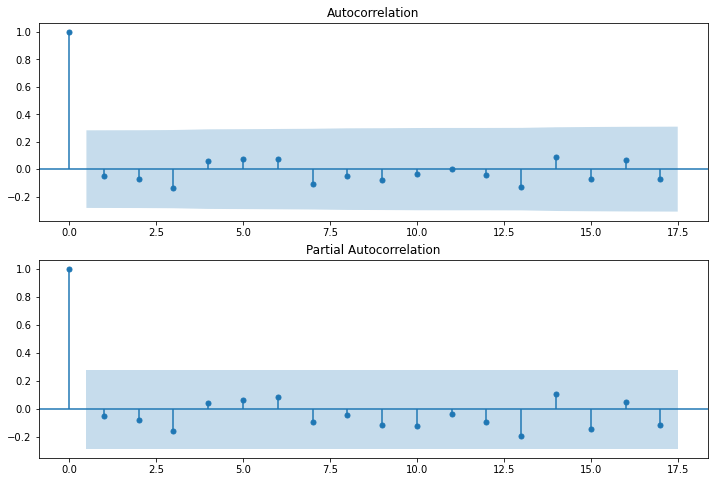

In [175]:
error_check=dict()
fig_HP = plt.figure(figsize=(12,8))
ax1 = fig_HP.add_subplot(211)
fig_HP1= statsmodels.graphics.tsaplots.plot_acf(ts_log["Himachal Pradesh"],ax=ax1)
ax2 = fig_HP.add_subplot(212)
fig_HP2= statsmodels.graphics.tsaplots.plot_pacf(ts_log["Himachal Pradesh"],ax=ax2)

In [176]:
model_1= auto_arima(train["Himachal Pradesh"], trace=True, error_action='ignore', suppress_warnings=True)
model_1.fit(train["Himachal Pradesh"])

forecast_H_1=model_1.predict(n_periods=14)
error_A=np.sqrt(mean_squared_error(test["Himachal Pradesh"],forecast_H_1))

error_check["error_Arima"]=error_A
error_check

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=102.321, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96.621, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=98.583, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=98.555, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=250.534, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=100.222, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.189 seconds


{'error_Arima': 0.9866468228400583}

## Sarima model

In [177]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train["Himachal Pradesh"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:243.0867911577918
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:148.48585828814078
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:71.85664561023786
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:73.03189125275352
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:28.1860146461177
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:40.85949942336138
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:77.39304076599419
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:76.70861794917798
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:31.659017835338503
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:30.55063854089567
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:30.185964941350118
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:31.492923196928025
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:33.4929232182

ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:80.73788320201136
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:78.46283675651388
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:39.601414914277456
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:42.878681796502704
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:40.015594123070684
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:38.78755797069241
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:40.78755807077927
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:39.609405128424754
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:109.28157803912652
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:57.6203285

ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:32.48940007813312
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:34.48940007740506
ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:36.489400077397875
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:94.16824606227367
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:45.52222341959432
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:29.76773859208271
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:71.00737418703307
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:29.39172938949442
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:34.90538163029472
ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:47.4221470738205
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - 

ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:27.30044839899039
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:76.63861622260947
ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:25.499678421515974
ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:35.644523995574
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:49.698700509314925
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:51.59468582601774
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:28.372362945645914
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:28.235660523326334
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:26.60839285650358
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:27.147640343978463
ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:29.280000490239267
ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:30.857506838115626
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:12.0

In [184]:
model_S=sm.tsa.statespace.SARIMAX(train["Himachal Pradesh"],order=(1,0,1),seasonal_order=(1,0,2,12))
result=model_S.fit()
pred_S=result.predict(start=34,end=47,dynamic=True)
error_S=np.sqrt(mean_squared_error(test["Himachal Pradesh"],pred_S))
error_S

error_check["error_S"]=error_S

In [185]:
error_S

0.9991016748696431

## FB prophet model

In [186]:
fb=pd.DataFrame()
fb["ds"]=ts_log.index
fb["y"]=ts_log["Himachal Pradesh"].values

In [187]:
model_P=Prophet()
model_P.fit(fb[0:34])

test_fb=pd.DataFrame(fb[34:48]["ds"],columns=["ds"])

prediction=model_P.predict(test_fb)

error_P=np.sqrt(mean_squared_error(fb[34:48]["y"],prediction[["yhat"]]))
error_check["error_P"]=error_P

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## LSTM model

In [188]:
X,y=prepare_data(train["Uttar Pradesh"],2)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [189]:
model_L = Sequential()
model_L.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(2,1)))
model_L.add(LSTM(30, activation='relu'))
model_L.add(Dense(1))
model_L.compile(optimizer='adam', loss='mse')
# fit model
model_L.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
32/32 [==============================] - 4s 131ms/sample - loss: 179.7556
Epoch 2/300
32/32 [==============================] - 0s 661us/sample - loss: 179.1843
Epoch 3/300
32/32 [==============================] - 0s 662us/sample - loss: 178.6036
Epoch 4/300
32/32 [==============================] - 0s 519us/sample - loss: 178.0127
Epoch 5/300
32/32 [==============================] - 0s 393us/sample - loss: 177.4112
Epoch 6/300
32/32 [==============================] - 0s 250us/sample - loss: 176.7989
Epoch 7/300
32/32 [==============================] - 0s 250us/sample - loss: 176.1761
Epoch 8/300
32/32 [==============================] - 0s 145us/sample - loss: 175.5449
Epoch 9/300
32/32 [==============================] - 0s 250us/sample - loss: 174.8953
Epoch 10/300
32/32 [==============================] - 0s 125us/sample - loss: 174.2264
Epoch 11/300
32/32 [==============================] - 0s 272us/sample - loss: 173.5404
Epoch 12/300
32/32 [==============================] 

Epoch 97/300
32/32 [==============================] - 0s 250us/sample - loss: 0.8240
Epoch 98/300
32/32 [==============================] - 0s 272us/sample - loss: 0.7882
Epoch 99/300
32/32 [==============================] - 0s 269us/sample - loss: 0.7455
Epoch 100/300
32/32 [==============================] - 0s 125us/sample - loss: 0.6991
Epoch 101/300
32/32 [==============================] - 0s 270us/sample - loss: 0.6516
Epoch 102/300
32/32 [==============================] - 0s 250us/sample - loss: 0.6056
Epoch 103/300
32/32 [==============================] - 0s 250us/sample - loss: 0.5628
Epoch 104/300
32/32 [==============================] - 0s 398us/sample - loss: 0.5252
Epoch 105/300
32/32 [==============================] - 0s 396us/sample - loss: 0.4935
Epoch 106/300
32/32 [==============================] - 0s 397us/sample - loss: 0.4682
Epoch 107/300
32/32 [==============================] - 0s 393us/sample - loss: 0.4496
Epoch 108/300
32/32 [==============================] - 0s

Epoch 193/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4168
Epoch 194/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4168
Epoch 195/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4167
Epoch 196/300
32/32 [==============================] - 0s 268us/sample - loss: 0.4167
Epoch 197/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4166
Epoch 198/300
32/32 [==============================] - 0s 271us/sample - loss: 0.4166
Epoch 199/300
32/32 [==============================] - 0s 270us/sample - loss: 0.4165
Epoch 200/300
32/32 [==============================] - 0s 433us/sample - loss: 0.4164
Epoch 201/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4164
Epoch 202/300
32/32 [==============================] - 0s 375us/sample - loss: 0.4163
Epoch 203/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4163
Epoch 204/300
32/32 [==============================] -

Epoch 289/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4112
Epoch 290/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4111
Epoch 291/300
32/32 [==============================] - 0s 275us/sample - loss: 0.4111
Epoch 292/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4110
Epoch 293/300
32/32 [==============================] - 0s 125us/sample - loss: 0.4110
Epoch 294/300
32/32 [==============================] - 0s 270us/sample - loss: 0.4109
Epoch 295/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4109
Epoch 296/300
32/32 [==============================] - 0s 375us/sample - loss: 0.4108
Epoch 297/300
32/32 [==============================] - 0s 431us/sample - loss: 0.4107
Epoch 298/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4107
Epoch 299/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4106
Epoch 300/300
32/32 [==============================] -

In [191]:
X_test,y_test=prepare_data(test["Himachal Pradesh"],2)
n_features = 1
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

testPredict = model_L.predict(X_test)
error_LSTM=np.sqrt(mean_squared_error(y_test,testPredict))
error_LSTM
error_check["error_LSTM"]=error_LSTM

In [192]:
error_check

{'error_Arima': 0.9866468228400583,
 'error_S': 0.9991016748696431,
 'error_P': 1.4479836748200396,
 'error_LSTM': 3.457241210239665}

In [ ]:
# so for Himachal Pradesh arima model has the lowest error rate so we use arima for future prediction

In [193]:
model_1= auto_arima(ts_log["Himachal Pradesh"], trace=True, error_action='ignore', suppress_warnings=True)
model_1.fit(ts_log["Himachal Pradesh"])

forecast_H_1=model_1.predict(n_periods=15)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=142.537, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=135.886, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=137.779, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=137.758, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=352.379, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=139.824, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.771 seconds


In [194]:
np.exp(forecast_H_1)

array([10493.184285, 10493.184285, 10493.184285, 10493.184285,
       10493.184285, 10493.184285, 10493.184285, 10493.184285,
       10493.184285, 10493.184285, 10493.184285, 10493.184285,
       10493.184285, 10493.184285, 10493.184285])

# for UTTARAKHAND

## Arima model

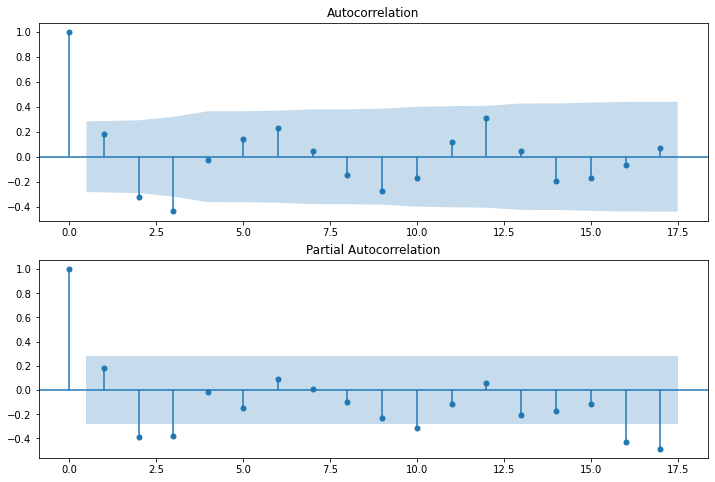

In [198]:
error_check=dict()
fig_U = plt.figure(figsize=(12,8))
ax1 = fig_U.add_subplot(211)
fig_U1= statsmodels.graphics.tsaplots.plot_acf(ts_log["Uttarakhand"],ax=ax1)
ax2 = fig_U.add_subplot(212)
fig_U2= statsmodels.graphics.tsaplots.plot_pacf(ts_log["Uttarakhand"],ax=ax2)

In [199]:
model_1= auto_arima(train["Uttarakhand"], trace=True, error_action='ignore', suppress_warnings=True)
model_1.fit(train["Uttarakhand"])

forecast_H_1=model_1.predict(n_periods=14)
error_A=np.sqrt(mean_squared_error(test["Uttarakhand"],forecast_H_1))

error_check["error_Arima"]=error_A
error_check

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11.905, Time=0.47 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12.743, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12.264, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=259.507, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14.267, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.187 seconds


{'error_Arima': 0.3759392101932434}

## Sarima model

In [200]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train["Uttarakhand"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:251.9723593814381
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:153.30609030448164
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:74.01256730122924
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8.865991865004855
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:7.356884695141308
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:12.169446642773952
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:11.598796850138951
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:10.76888177573003
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:10.227334996290143
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8.633355450244242
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:9.356883750124858
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:8.458312659423735
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:10.458312910

ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:33.89290340934671
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:30.39967654045768
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:15.029904503577075
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:11.603044386660239
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:13.292372397513343
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:10.430893897454538
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:12.430893882997209
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:14.627302567487718
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:29.024820855291075
ARIM

ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:13.904971972241409
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:10.216595733244116
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:12.216595733875332
ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:14.216595739910389
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:17.140329397687907
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:15.376912944885433
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:13.493600358186388
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:14.813863381546959
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:9.802797088364837
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:15

ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:14.213358059364216
ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:16.213358071025556
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:18.27898717540336
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:16.61802830292026
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:17.171812388965996
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:13.440158176635636
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:8.774361625547954
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:14.903280789233694
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:14.497643306821567
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:16.434719451566416
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:15.203948745075287
ARIMA(2, 

ARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:32.330892473201715
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:23.546615890712268
ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:12.579280698720035
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:25.406272183510076
ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:2.6106457779927084
ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:18.18024190168809
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:23.314261456836178
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:24.902071104731938
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:12.154625812426135
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:1.8092307326763581
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:3.7200657977582026
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:5.1604610243

In [201]:
model_S=sm.tsa.statespace.SARIMAX(train["Uttarakhand"],order=(2,0,2),seasonal_order=(2,0,0,12))
result=model_S.fit()
pred_S=result.predict(start=34,end=47,dynamic=True)
error_S=np.sqrt(mean_squared_error(test["Uttarakhand"],pred_S))
error_S

error_check["error_S"]=error_S

## FB prophet

In [202]:
fb=pd.DataFrame()
fb["ds"]=ts_log.index
fb["y"]=ts_log["Uttarakhand"].values

In [203]:
model_P=Prophet()
model_P.fit(fb[0:34])

test_fb=pd.DataFrame(fb[34:48]["ds"],columns=["ds"])

prediction=model_P.predict(test_fb)

error_P=np.sqrt(mean_squared_error(fb[34:48]["y"],prediction[["yhat"]]))
error_check["error_P"]=error_P

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## LSTM model

In [204]:
X,y=prepare_data(train["Uttarakhand"],2)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [205]:
model_L = Sequential()
model_L.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(2,1)))
model_L.add(LSTM(30, activation='relu'))
model_L.add(Dense(1))
model_L.compile(optimizer='adam', loss='mse')
# fit model
model_L.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
32/32 [==============================] - 3s 96ms/sample - loss: 112.3000
Epoch 2/300
32/32 [==============================] - 0s 500us/sample - loss: 111.9423
Epoch 3/300
32/32 [==============================] - 0s 250us/sample - loss: 111.5916
Epoch 4/300
32/32 [==============================] - 0s 281us/sample - loss: 111.2442
Epoch 5/300
32/32 [==============================] - 0s 219us/sample - loss: 110.8948
Epoch 6/300
32/32 [==============================] - 0s 187us/sample - loss: 110.5592
Epoch 7/300
32/32 [==============================] - 0s 281us/sample - loss: 110.2252
Epoch 8/300
32/32 [==============================] - 0s 219us/sample - loss: 109.8816
Epoch 9/300
32/32 [==============================] - 0s 187us/sample - loss: 109.5273
Epoch 10/300
32/32 [==============================] - 0s 250us/sample - loss: 109.1613
Epoch 11/300
32/32 [==============================] - 0s 406us/sample - loss: 108.7830
Epoch 12/300
32/32 [==============================] -

Epoch 97/300
32/32 [==============================] - 0s 281us/sample - loss: 0.5432
Epoch 98/300
32/32 [==============================] - 0s 312us/sample - loss: 0.5127
Epoch 99/300
32/32 [==============================] - 0s 250us/sample - loss: 0.4737
Epoch 100/300
32/32 [==============================] - 0s 247us/sample - loss: 0.4295
Epoch 101/300
32/32 [==============================] - 0s 250us/sample - loss: 0.3836
Epoch 102/300
32/32 [==============================] - 0s 250us/sample - loss: 0.3389
Epoch 103/300
32/32 [==============================] - 0s 274us/sample - loss: 0.2981
Epoch 104/300
32/32 [==============================] - 0s 317us/sample - loss: 0.2632
Epoch 105/300
32/32 [==============================] - 0s 375us/sample - loss: 0.2355
Epoch 106/300
32/32 [==============================] - 0s 250us/sample - loss: 0.2155
Epoch 107/300
32/32 [==============================] - 0s 250us/sample - loss: 0.2032
Epoch 108/300
32/32 [==============================] - 0s

Epoch 193/300
32/32 [==============================] - 0s 250us/sample - loss: 0.1959
Epoch 194/300
32/32 [==============================] - 0s 272us/sample - loss: 0.1959
Epoch 195/300
32/32 [==============================] - 0s 457us/sample - loss: 0.1959
Epoch 196/300
32/32 [==============================] - 0s 125us/sample - loss: 0.1959
Epoch 197/300
32/32 [==============================] - 0s 250us/sample - loss: 0.1958
Epoch 198/300
32/32 [==============================] - 0s 125us/sample - loss: 0.1958
Epoch 199/300
32/32 [==============================] - 0s 375us/sample - loss: 0.1958
Epoch 200/300
32/32 [==============================] - 0s 273us/sample - loss: 0.1958
Epoch 201/300
32/32 [==============================] - 0s 250us/sample - loss: 0.1958
Epoch 202/300
32/32 [==============================] - 0s 250us/sample - loss: 0.1958
Epoch 203/300
32/32 [==============================] - 0s 271us/sample - loss: 0.1957
Epoch 204/300
32/32 [==============================] -

Epoch 289/300
32/32 [==============================] - 0s 271us/sample - loss: 0.1940
Epoch 290/300
32/32 [==============================] - 0s 269us/sample - loss: 0.1939
Epoch 291/300
32/32 [==============================] - 0s 305us/sample - loss: 0.1939
Epoch 292/300
32/32 [==============================] - 0s 250us/sample - loss: 0.1939
Epoch 293/300
32/32 [==============================] - 0s 250us/sample - loss: 0.1939
Epoch 294/300
32/32 [==============================] - 0s 375us/sample - loss: 0.1938
Epoch 295/300
32/32 [==============================] - 0s 318us/sample - loss: 0.1938
Epoch 296/300
32/32 [==============================] - 0s 250us/sample - loss: 0.1938
Epoch 297/300
32/32 [==============================] - 0s 250us/sample - loss: 0.1938
Epoch 298/300
32/32 [==============================] - 0s 250us/sample - loss: 0.1938
Epoch 299/300
32/32 [==============================] - 0s 255us/sample - loss: 0.1937
Epoch 300/300
32/32 [==============================] -

In [206]:
X_test,y_test=prepare_data(test["Uttarakhand"],2)
n_features = 1
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

testPredict = model_L.predict(X_test)
error_LSTM=np.sqrt(mean_squared_error(y_test,testPredict))
error_LSTM
error_check["error_LSTM"]=error_LSTM

In [207]:
error_check

{'error_Arima': 0.3759392101932434,
 'error_S': 0.34179346523717713,
 'error_P': 0.42215136988279395,
 'error_LSTM': 0.6268667930259804}

In [208]:
#so for uttarakhand sarima model gives the least error rate so we will make the future prediction with sarima model

In [209]:
model_S=sm.tsa.statespace.SARIMAX(ts_log["Uttarakhand"],order=(2,0,2),seasonal_order=(2,0,0,12))
result=model_S.fit()
pred_S=result.predict(start=48,end=62,dynamic=True)

In [210]:
np.exp(pred_S)

2018-01-01    37522.014235
2018-02-01    36658.340677
2018-03-01    44410.336870
2018-04-01    32712.881013
2018-05-01    51225.464068
2018-06-01    50177.677470
2018-07-01    47767.104128
2018-08-01    39637.446257
2018-09-01    31013.257067
2018-10-01    35217.229623
2018-11-01    56432.202194
2018-12-01    57740.879506
2019-01-01    44890.057910
2019-02-01    47937.798012
2019-03-01    46791.113414
Freq: MS, Name: predicted_mean, dtype: float64